In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau

from skimage.feature import graycomatrix, graycoprops
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
import glob as gb
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Conv1D, MaxPool1D
from tensorflow.keras.layers import Dense, Input, Dropout, concatenate
from tensorflow.keras.models import Model

In [4]:
trainData=[]
trainLabels=[]

for root, _, files in os.walk('/content/drive/MyDrive/minipjt/Training/notumor'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'notumor' in image_path:
        label = 0
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        trainData.append(image_array)
        trainLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")
for root, _, files in os.walk('/content/drive/MyDrive/minipjt/Training/glioma'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'glioma' in image_path:
        label = 1
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        trainData.append(image_array)
        trainLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")
for root, _, files in os.walk('/content/drive/MyDrive/minipjt/Training/pituitary'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'pituitary' in image_path:
        label = 2
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        trainData.append(image_array)
        trainLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")
for root, _, files in os.walk('/content/drive/MyDrive/minipjt/Training/meningioma'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'meningioma' in image_path:
        label = 3
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        trainData.append(image_array)
        trainLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")

In [5]:
testData=[]
testLabels=[]

for root, _, files in os.walk('/content/drive/MyDrive/minipjt/Testing/notumor'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'notumor' in image_path:
        label = 0
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        testData.append(image_array)
        testLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")
for root, _, files in os.walk('/content/drive/MyDrive/minipjt/Testing/glioma'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'glioma' in image_path:
        label = 1
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        testData.append(image_array)
        testLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")
for root, _, files in os.walk('/content/drive/MyDrive/minipjt/Testing/pituitary'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'pituitary' in image_path:
        label = 2
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        testData.append(image_array)
        testLabels.append(label)
        #print(f"Image Path: {image_path}, Label: {label}")
for root, _, files in os.walk('/content/drive/MyDrive/minipjt/Testing/meningioma'):
  for file in files:
    if file.endswith('.jpg'):
      image_path = os.path.join(root,file)
      if 'meningioma' in image_path:
        label = 3
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224,224))
        image_array = np.array(image)
        testData.append(image_array)
        testLabels.append(label)

In [6]:
from keras.utils import to_categorical
X_train = trainData
y_train = trainLabels
X_test = testData
y_test = testLabels

y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)
y_val = tf.keras.utils.to_categorical(y_train, num_classes=4)

X_val, X_test = train_test_split(X_test, train_size=.3, random_state=20)
y_val, y_test = train_test_split(y_test, train_size=.3, random_state=20)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)


print(f"Shape of images in X_train: {X_train.shape}")
print(f"Shape of images in X_test: {X_test.shape}")
print(f"Shape of images in X_val: {X_val.shape}")
print(f"Shape of images in y_train: {y_train.shape}")
print(f"Shape of images in y_test: {y_test.shape}")
print(f"Shape of images in y_val: {y_val.shape}")

Shape of images in X_train: (5712, 224, 224, 3)
Shape of images in X_test: (923, 224, 224, 3)
Shape of images in X_val: (395, 224, 224, 3)
Shape of images in y_train: (5712, 4)
Shape of images in y_test: (923, 4)
Shape of images in y_val: (395, 4)


In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import resnet
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GRU, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, GRU, Dense, Flatten, Dropout, TimeDistributed, GlobalAveragePooling2D

# Define ResNet50 model
resnet_base = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze ResNet50 layers
for layer in resnet_base.layers:
    layer.trainable = False

# Define GRU model
sequence_length = 1 # Define the length of the sequence
input_sequence = Input(shape=(sequence_length, 224, 224, 3))
gru_layer = tf.keras.layers.TimeDistributed(resnet_base)(input_sequence)
gru_layer = TimeDistributed(GlobalAveragePooling2D())(gru_layer)  # Reduce spatial dimensions
gru_layer = GRU(units=64)(gru_layer)

# Add dense layers for further processing
top_layer = Flatten()(gru_layer)
top_layer = Dropout(0.5)(top_layer)
top_layer = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1())(top_layer) # Lasso regularization
output_layer = Dense(4, activation="softmax")(top_layer)  # Assuming 4 classes for classification

# Combine ResNet50 and GRU layers into a single model
combined_model = Model(inputs=input_sequence, outputs=output_layer)

# Compile the model
combined_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
combined_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 224, 224, 3)   0         
                             ]                                   
                                                                 
 time_distributed (TimeDist  (None, 1, 7, 7, 2048)     23587712  
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 2048)           0         
 stributed)                                                      
                                                                 
 gru (GRU)                   (None, 64)                405888    
                                                                 
 flatten (Flatten)           (None, 64)                0      

In [8]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return np.array(sequences)


X_train_sequences = create_sequences(X_train, sequence_length)
X_test_sequences = create_sequences(X_test, sequence_length)
X_val_sequences = create_sequences(X_val, sequence_length)


print("Shape of X_train_sequences:", X_train_sequences.shape)
print("Shape of X_test_sequences:", X_test_sequences.shape)
print("Shape of X_test_sequences:", X_val_sequences.shape)

Shape of X_train_sequences: (5712, 1, 224, 224, 3)
Shape of X_test_sequences: (923, 1, 224, 224, 3)
Shape of X_test_sequences: (395, 1, 224, 224, 3)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fit the model
history = combined_model.fit(X_train_sequences, y_train, epochs=20, validation_data=(X_val_sequences, y_val))

Epoch 1/20
179/179 [==============================] - 1145s 6s/step - loss: 3.7069 - accuracy: 0.8053 - val_loss: 1.1330 - val_accuracy: 0.8304
Epoch 2/20
179/179 [==============================] - 1138s 6s/step - loss: 0.7480 - accuracy: 0.8927 - val_loss: 0.6689 - val_accuracy: 0.8608
Epoch 3/20
179/179 [==============================] - 1125s 6s/step - loss: 0.5513 - accuracy: 0.9074 - val_loss: 0.5493 - val_accuracy: 0.8785
Epoch 4/20
179/179 [==============================] - 1119s 6s/step - loss: 0.4641 - accuracy: 0.9224 - val_loss: 0.5000 - val_accuracy: 0.8886
Epoch 5/20
179/179 [==============================] - 1120s 6s/step - loss: 0.4210 - accuracy: 0.9307 - val_loss: 0.4616 - val_accuracy: 0.9013
Epoch 6/20
179/179 [==============================] - 1122s 6s/step - loss: 0.3752 - accuracy: 0.9354 - val_loss: 0.3945 - val_accuracy: 0.9114
Epoch 7/20
179/179 [==============================] - 1118s 6s/step - loss: 0.3595 - accuracy: 0.9347 - val_loss: 0.3854 - val_accuracy:

In [10]:
loss, accuracy = combined_model.evaluate(X_test_sequences, y_test)
print("Test Loss:", loss)
print("Test Accuracy:",accuracy)

29/29 [==============================] - 170s 6s/step - loss: 0.2283 - accuracy: 0.9556
Test Loss: 0.22826214134693146
Test Accuracy: 0.9555796384811401


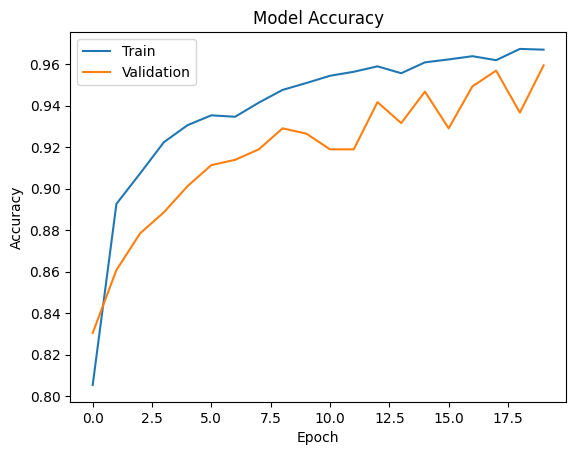

In [11]:
# Plot validation and training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

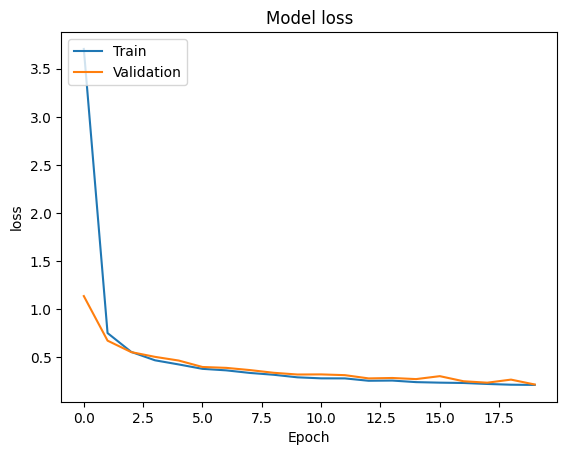

In [20]:
# Plot validation and training accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

29/29 [==============================] - 170s 6s/step


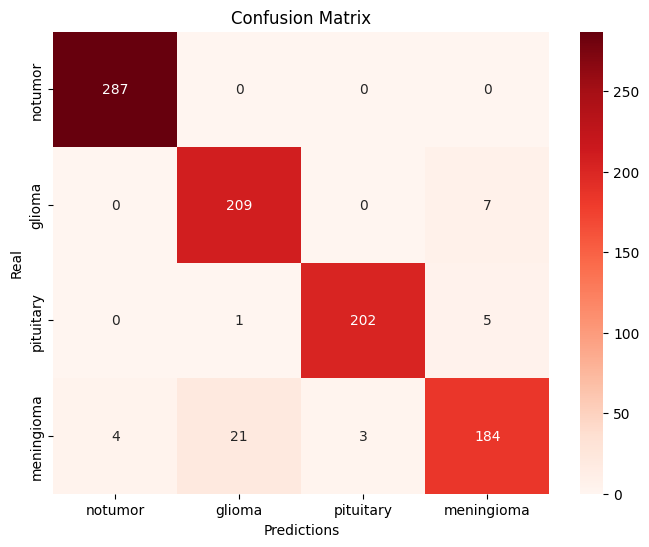

In [25]:
# Ensure X_test is in the correct shape
# Assuming X_test is already properly formatted

# Predict classes using the model
pred = combined_model.predict(X_test.reshape(-1, 1, 224, 224, 3))

# Get the class predictions and true labels
classPred = np.argmax(pred, axis=1)
classLabel = np.argmax(y_test, axis=1)

# Compute confusion matrix
con_matrix = confusion_matrix(classLabel, classPred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['notumor', 'glioma', 'pituitary', 'meningioma'],
            yticklabels=['notumor', 'glioma', 'pituitary', 'meningioma'])
plt.xlabel('Predictions')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()
